<a href="https://colab.research.google.com/github/SahputraS/Flu-Forecast/blob/main/ILI_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [73]:
packages_needed <- c(
  "readr",
  "readxl",
  "dplyr",
  "tidyr",
  "lubridate",
  "stringr",
  "ggplot2",
  "magrittr",
  "gtrendsR",
  "bestNormalize",
  "zoo",
  "broom"
)

packages_to_install <- packages_needed[!(packages_needed %in% installed.packages()[,"Package"])]
if(length(packages_to_install)) {
  install.packages(packages_to_install)
}

lapply(packages_needed, library, character.only = TRUE)

[[1]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[2]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[3]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[4]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[5]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[6]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[7]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[8]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[9]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[10]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[11]]
 [1] "zoo"           "bestNormalize" "gtrendsR"      "magrittr"     
 [5] "ggplot2"       "stringr"       "lubridate"     "tidyr"        
 [9] "dplyr"         "readxl"        "readr"         "stats"        
[13] "graphics"      "grDevices"     "utils"         "datasets"     
[17] "methods"       "base"         

[[12]]
 [1] "broom"         "zoo"           "bestNormalize" "gtrendsR"     
 [5] "magrittr"      "ggplot2"       "stringr"       "lubridate"    
 [9] "tidyr"         "dplyr"         "readxl"        "readr"        
[13] "stats"         "graphics"      "grDevices"     "utils"        
[17] "datasets"      "methods"       "base"

## Data Download (Example case: Belgium)

In [8]:
# Check raw data
url <- "https://raw.githubusercontent.com/european-modelling-hubs/RespiCast-SyndromicIndicators/main/target-data/latest-ILI_incidence.csv"
ili_all <- read_csv(url, show_col_types = FALSE)

In [9]:
loc_target = list('BE','CZ','EE','GR','IE','LU','NL','PL')

In [10]:
ili_df <- ili_all %>% filter (location %in% loc_target) %>% rename(date = truth_date)
head(ili_df,5)

target,location,date,year_week,value,data_source
<chr>,<chr>,<date>,<chr>,<dbl>,<chr>
ILI incidence,BE,2025-09-07,2025-W36,57.2,ERVISS
ILI incidence,BE,2025-08-31,2025-W35,33.9,ERVISS
ILI incidence,BE,2025-08-24,2025-W34,65.1,ERVISS
ILI incidence,BE,2025-08-17,2025-W33,45.6,ERVISS
ILI incidence,BE,2025-08-10,2025-W32,54.3,ERVISS


In [11]:
googleTrendsData <- function (keywords, location) {

  time <- ("2016-01-01 2025-09-07")
  channel <- 'web'

  trends <- gtrends(keywords,
                    gprop = channel,
                    geo = location,
                    time = time)

  results <- trends$interest_over_time
  return (results)
}

In [26]:
gt_list <- lapply(loc_target, function(loc) {
  Sys.sleep(5)
  googleTrendsData(keywords = 'influenza', location = loc)
})

google_df <- bind_rows(gt_list) %>% rename(location = geo)
head(google_df, 5)

,date,hits,keyword,location,time,gprop,category
,<dttm>,<int>,<chr>,<chr>,<chr>,<chr>,<int>
1,2016-01-01,22,influenza,BE,2016-01-01 2025-09-07,web,0
2,2016-02-01,21,influenza,BE,2016-01-01 2025-09-07,web,0
3,2016-03-01,21,influenza,BE,2016-01-01 2025-09-07,web,0
4,2016-04-01,13,influenza,BE,2016-01-01 2025-09-07,web,0
5,2016-05-01,11,influenza,BE,2016-01-01 2025-09-07,web,0


In [27]:
# I need the data in weekly basis, so i will do the interpolation
google_df2 <- google_df %>%
  mutate(date = as.Date(date), location = as.character(location)) %>%
  arrange(location, date) %>%
  # make to weekly data instead of monthly, and the week starts on sunday like the ILI data
  mutate(week_sun = floor_date(date, "week", week_start = 1) + days(6)) %>%
  summarise(hits = mean(hits, na.rm = TRUE), .by = c(location, week_sun)) %>%
  mutate(location = as.character(location))%>%
  group_by(location) %>%
  complete(week_sun = full_seq(week_sun, 7)) %>%
  mutate(hits = na.approx(hits, x = as.numeric(week_sun), na.rm = TRUE)) %>%
  ungroup() %>%
  rename(date = week_sun)

In [28]:
head(google_df2,5)

location,date,hits
<chr>,<date>,<dbl>
BE,2016-01-03,22.0
BE,2016-01-10,21.8
BE,2016-01-17,21.6
BE,2016-01-24,21.4
BE,2016-01-31,21.2


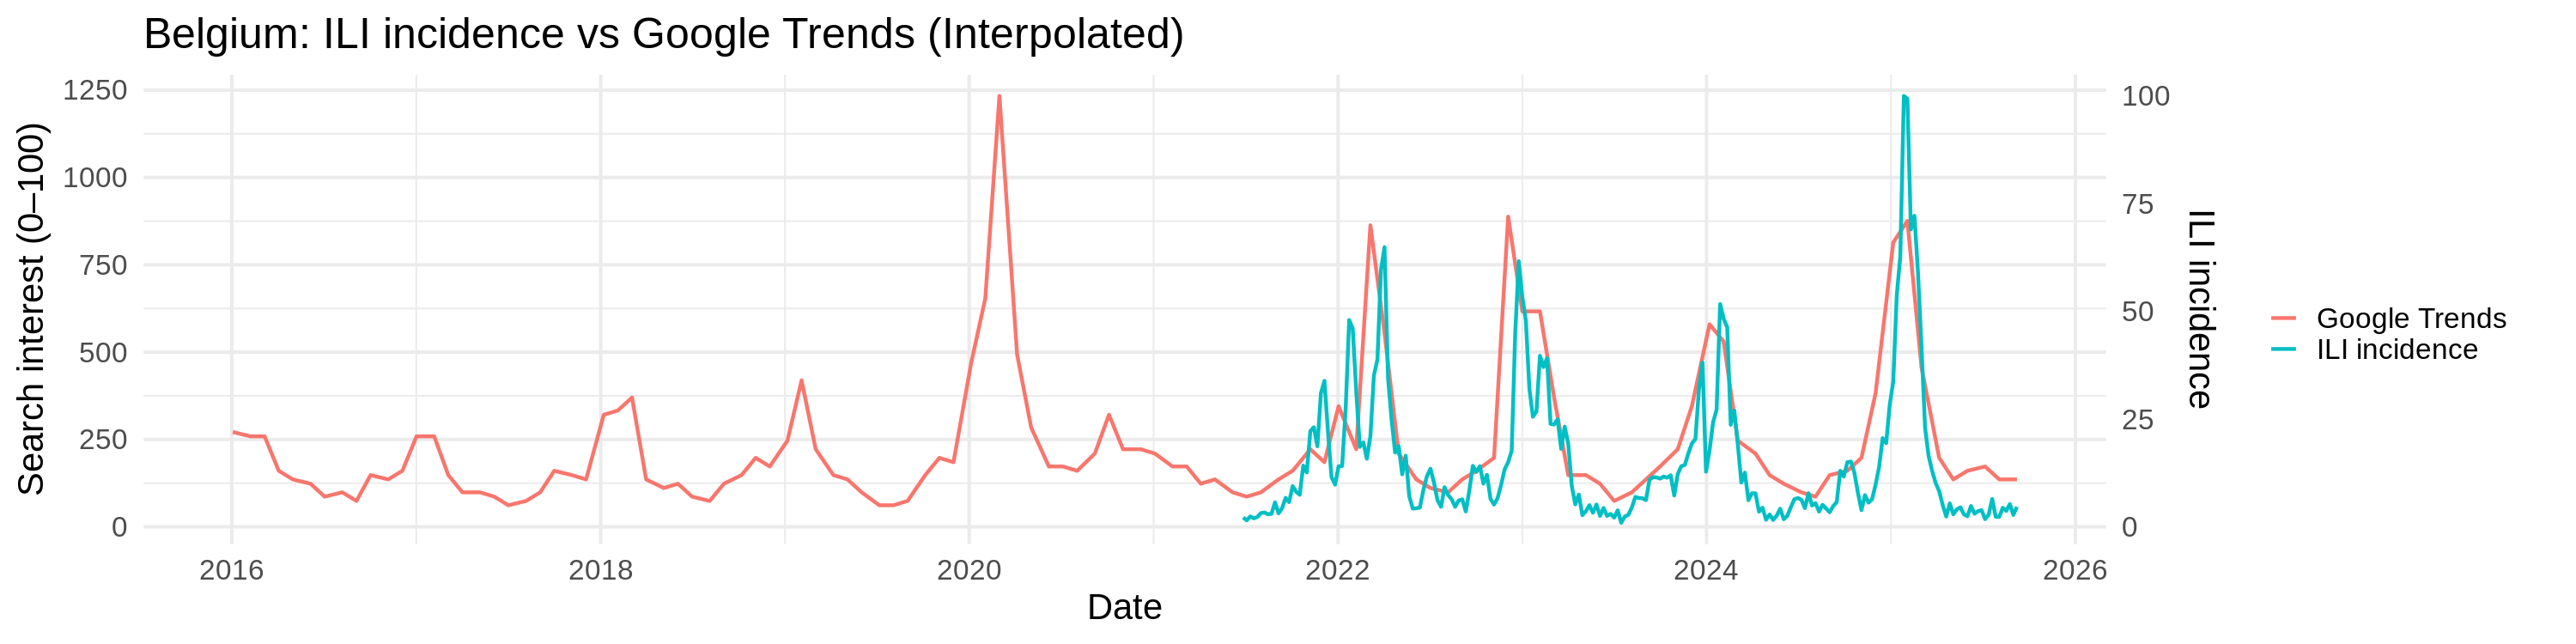

In [97]:
g <- google_df2 %>% filter(location == 'BE') %>% mutate(date = as.Date(date)) %>% select(date, hits)
i <- ili_df %>% filter(location == 'BE') %>% select(date = date, ili = value)

scale <- max(i$ili, na.rm = TRUE) / max(g$hits, na.rm = TRUE)

options(repr.plot.width = 20, repr.plot.height = 5, repr.plot.res = 150)

ggplot() +
  geom_line(data = g, aes(date, hits* scale, color = "Google Trends"), size = 1) +
  geom_line(data = i, aes(date, ili, color = "ILI incidence"), size = 1) +
  scale_y_continuous(
    name = "Search interest (0–100)",
    sec.axis = sec_axis(~ . / scale, name = "ILI incidence")
  ) +
  labs(title = "Belgium: ILI incidence vs Google Trends (Interpolated)", x = "Date", color = "") +
  theme_minimal(base_size=20)


## Fitting Dataset
based on https://www.sciencedirect.com/science/article/pii/S1755436525000040?via%3Dihub#sec2

In [31]:
# Normalization of Google Trend (do i need to since it is already normalize?)
google_norm <- google_df2 %>% mutate(gt_norm = orderNorm(hits)$x.t) #just so it is similar to the paper

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `gt_norm = orderNorm(hits)$x.t`.
Caused by warning in `orderNorm()`:
! Ties in data, Normal distribution not guaranteed”


In [32]:
# ILI transform
ili_trans <- ili_df %>% mutate(ili_log = log(value + 1))

In [35]:
train_data <- inner_join(google_norm, ili_trans, by = c("date", "location")) %>% select(c('date','hits', 'ili_log', 'value', 'location'))
head(train_data,5)

date,hits,ili_log,value,location
<date>,<dbl>,<dbl>,<dbl>,<chr>
2021-06-27,7.25,3.321432,26.7,BE
2021-07-04,7.00,2.965273,18.4,BE
2021-07-11,7.25,3.421000,29.6,BE
2021-07-18,7.50,3.226844,24.2,BE
2021-07-25,7.75,3.374169,28.2,BE


`geom_smooth()` using formula = 'y ~ x'


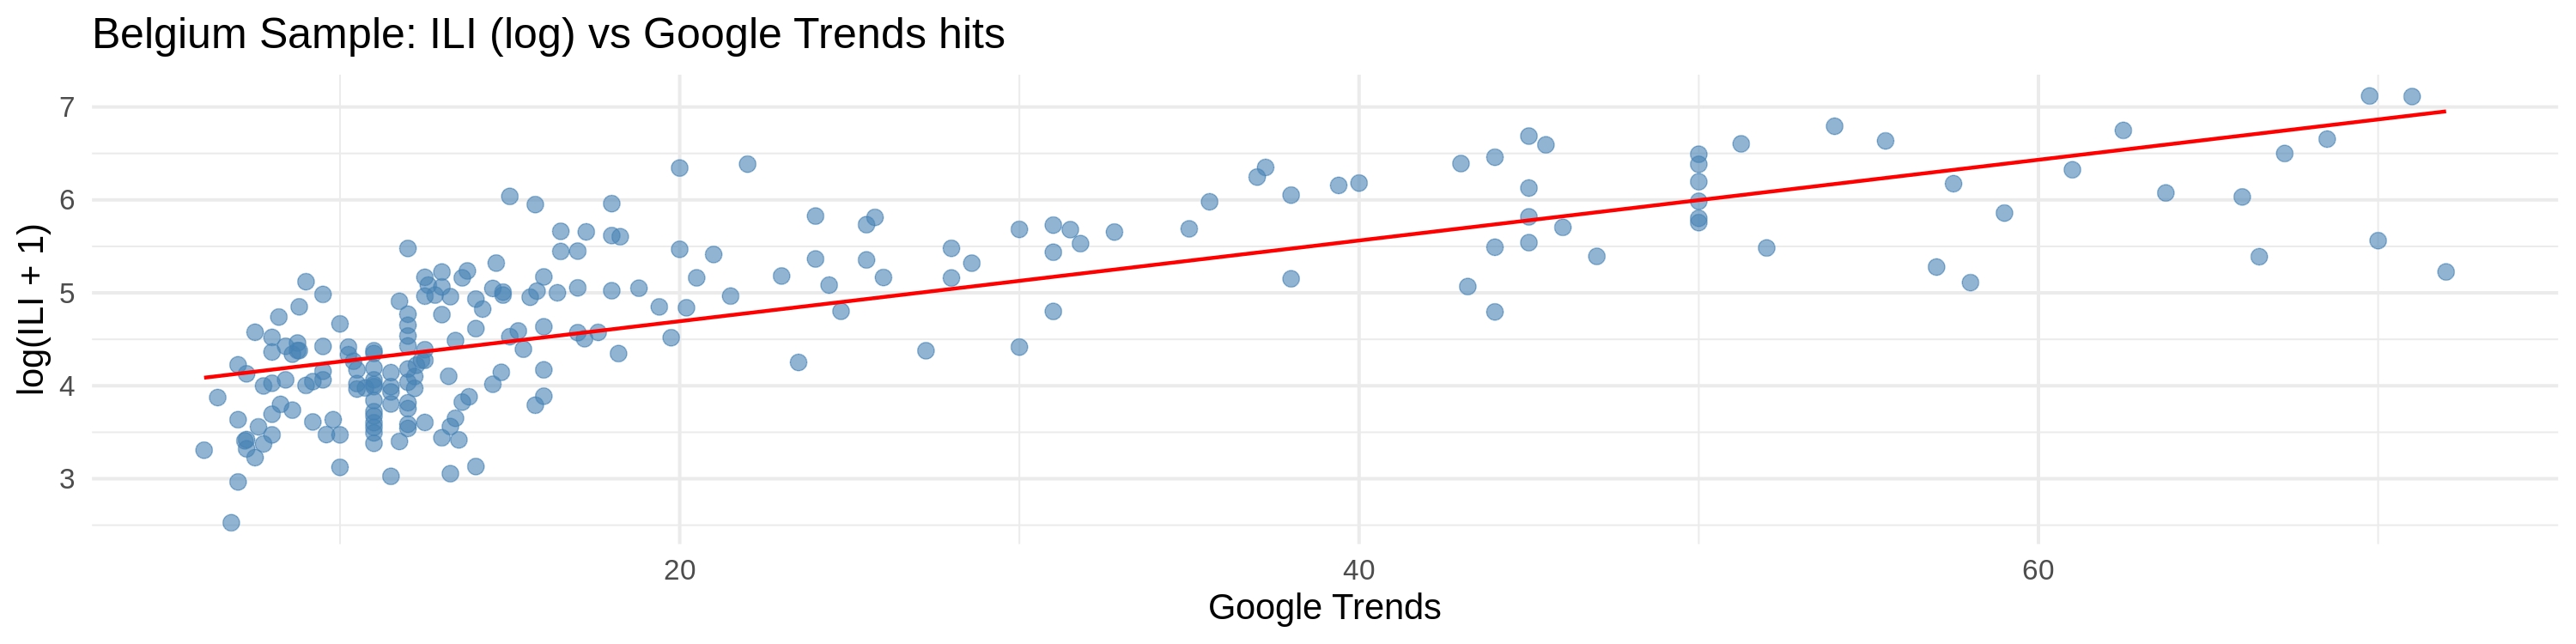

In [78]:
ggplot(train_data %>% filter(location == 'BE') , aes(x = hits, y = ili_log)) +
  geom_point(alpha = 0.6, color = "steelblue", size=4) +
  geom_smooth(method = "lm", se = FALSE, color = "red") +
  labs(title = "Belgium Sample: ILI (log) vs Google Trends hits",
       x = "Google Trends",
       y = "log(ILI + 1)")+
  theme_minimal(base_size=20)

In [63]:
best_lag <- function(x, y, lag.max = 10) {
  cc <- ccf(x, y, lag.max = lag.max, plot = FALSE, na.action = na.omit)
  idx <- which.max(abs(cc$acf))
  return(list(lag  = cc$lag[idx], corr = cc$acf[idx]))
}

In [64]:
lag_results <- train_data %>%
               group_by(location) %>%
               summarise(best_k_lag = best_lag(hits, value)$lag,
                         best_corr = best_lag(hits, value)$corr,
                         .groups = "drop" )
lag_results

location,best_k_lag,best_corr
<chr>,<dbl>,<dbl>
BE,-2,0.8546684
CZ,-4,0.8239172
EE,-2,0.6850527
GR,-3,0.8175563
IE,-3,0.7421126
LU,-3,0.8525532
NL,-2,0.8724813
PL,-2,0.7845765


In [71]:
# Adjust to best lag
train_data2 <- train_data %>%
               left_join(lag_results %>% select(location, best_k_lag), by = "location") %>%
               group_by(location) %>%
               mutate(hits_lag = lag(hits, n = -first(best_k_lag))) %>%
               ungroup() %>%
               filter(!is.na(hits_lag))

In [72]:
head(train_data2)

date,hits,ili_log,value,location,best_k_lag,hits_lag
<date>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
2021-07-11,7.25,3.421000,29.6,BE,-2,7.25
2021-07-18,7.50,3.226844,24.2,BE,-2,7.00
2021-07-25,7.75,3.374169,28.2,BE,-2,7.25
2021-08-01,8.00,3.693867,39.2,BE,-2,7.50
2021-08-08,8.60,3.737670,41.0,BE,-2,7.75
2021-08-15,9.20,3.610918,36.0,BE,-2,8.00


## Make model

In [81]:
ili_pred <- function(hits, model) {
  b <- coef(model)
  ili_log_pred <- b[1] + b[2] * hits
  ili_pred <- exp(ili_log_pred) - 1
  return(list(ili_log_pred = ili_log_pred, ili_pred = ili_pred))
}

In [96]:
pred_list <- list()
k = 0
for (loc in loc_target){
  k = k+1
  train_data_loc <- train_data2 %>% filter(location == loc)
  model <- lm(ili_log ~ hits_lag, data = train_data_loc) # fit with linear model
  pred_list[[k]] <- data.frame(
                date = train_data_loc$date,
                ili_pred = ili_pred(train_data_loc$hits_lag, model)$ili_pred,
                location = loc)
}

pred_df <- bind_rows(pred_list)

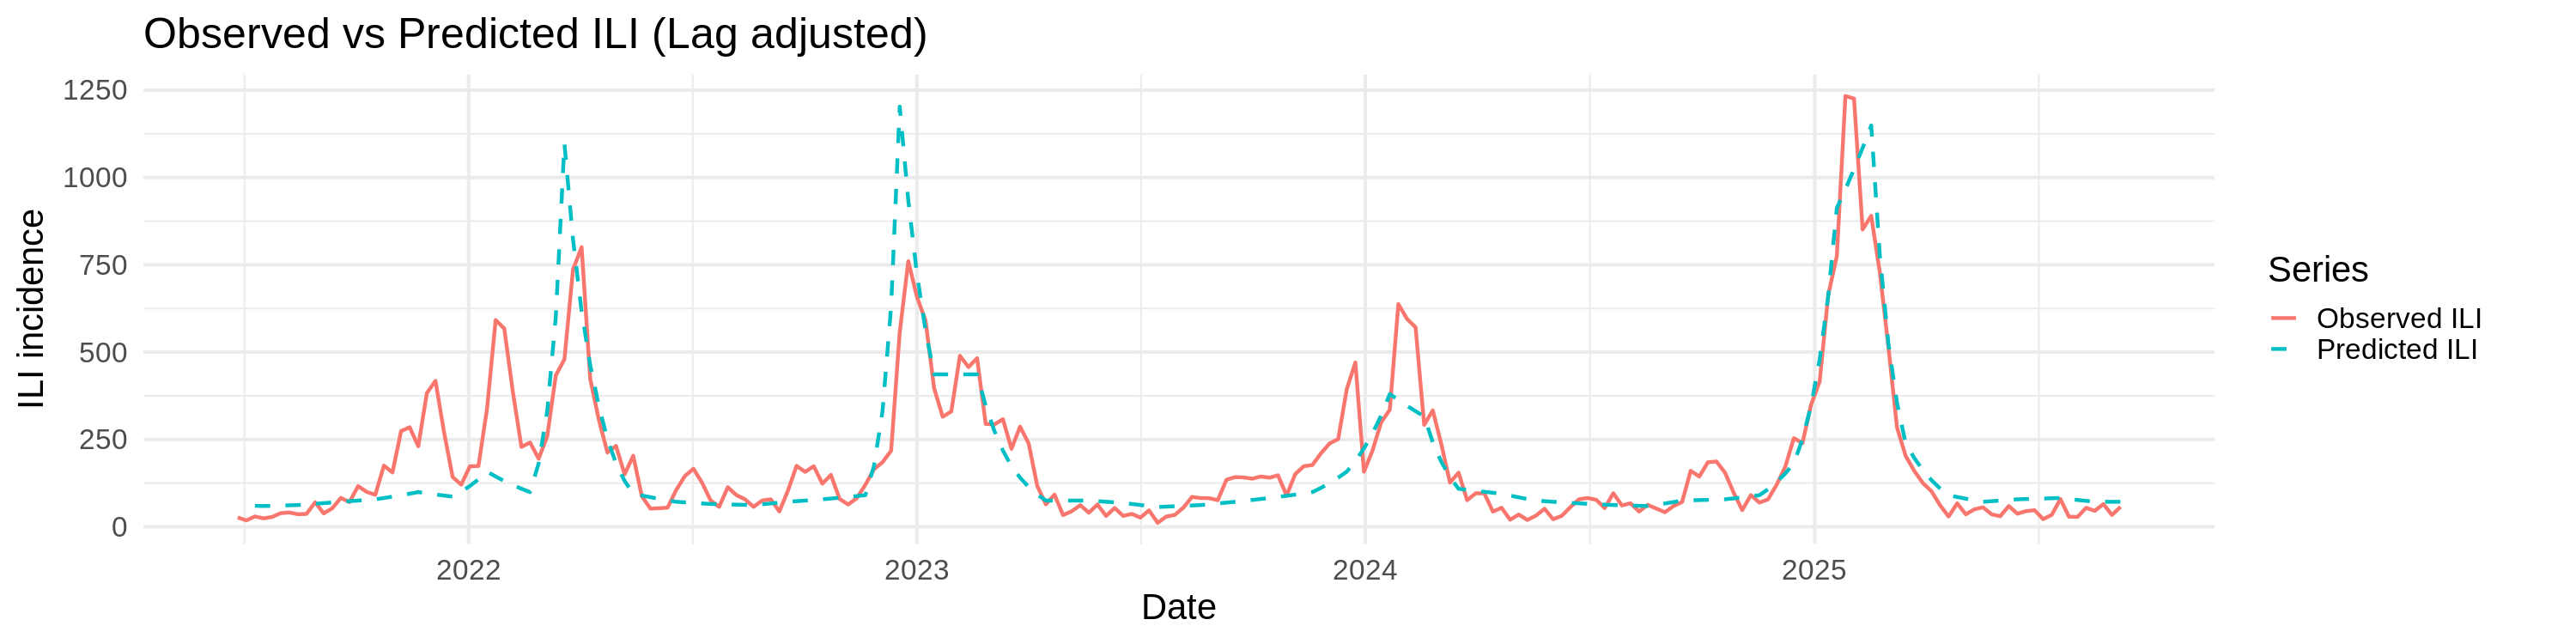

In [106]:
ggplot() +
  geom_line(data = i,
            aes(x = date, y = ili, color = "Observed ILI"), size = 1) +
  geom_line(data = pred_df %>% filter(location == 'BE'),
            aes(x = date, y = ili_pred, color = "Predicted ILI"),
            size = 1, linetype = "dashed") +
  labs(title = "Observed vs Predicted ILI (Lag adjusted)",
       x = "Date", y = "ILI incidence", color = "Series") +
  theme_minimal(base_size=20)

## Generate Past ILI Data

In [115]:
cutoff_df <- train_data2 %>% group_by(location) %>% summarise(min(date), .groups = "drop")
cutoff_df

location,min(date)
<chr>,<date>
BE,2021-07-11
CZ,2021-07-25
EE,2021-07-11
GR,2021-07-18
IE,2021-07-18
LU,2021-07-18
NL,2021-07-11
PL,2021-07-11


In [132]:
google_histdate <- google_df2 %>%
                  inner_join(cutoff_df, by = "location") %>%
                  filter(date < cutoff) %>%
                  left_join(lag_results %>% select(location, best_k_lag), by = "location") %>%
                  group_by(location) %>%
                  mutate(hits_lag = lag(hits, n = -first(best_k_lag))) %>%
                  ungroup() %>%
                  filter(!is.na(hits_lag)) %>%
                  select(location, date, hits, hits_lag)

In [133]:
head(google_histdate,3)

location,date,hits,hits_lag
<chr>,<date>,<dbl>,<dbl>
BE,2016-01-17,21.6,22.0
BE,2016-01-24,21.4,21.8
BE,2016-01-31,21.2,21.6


In [134]:
pred_hist_list <- list()
k = 0
for (loc in loc_target){
  k = k+1
  ghist_loc <- google_histdate %>% filter(location == loc)
  pred_hist_list[[k]] <- data.frame(
                date = ghist_loc$date,
                ili_pred = ili_pred(ghist_loc$hits_lag, model)$ili_pred,
                location = loc)
}

pred_hist_df <- bind_rows(pred_hist_list)

In [136]:
head(pred_hist_df,5)

,date,ili_pred,location
,<date>,<dbl>,<chr>
1,2016-01-17,234.2049,BE
2,2016-01-24,231.2850,BE
3,2016-01-31,228.4014,BE
4,2016-02-07,225.5536,BE
5,2016-02-14,222.7411,BE


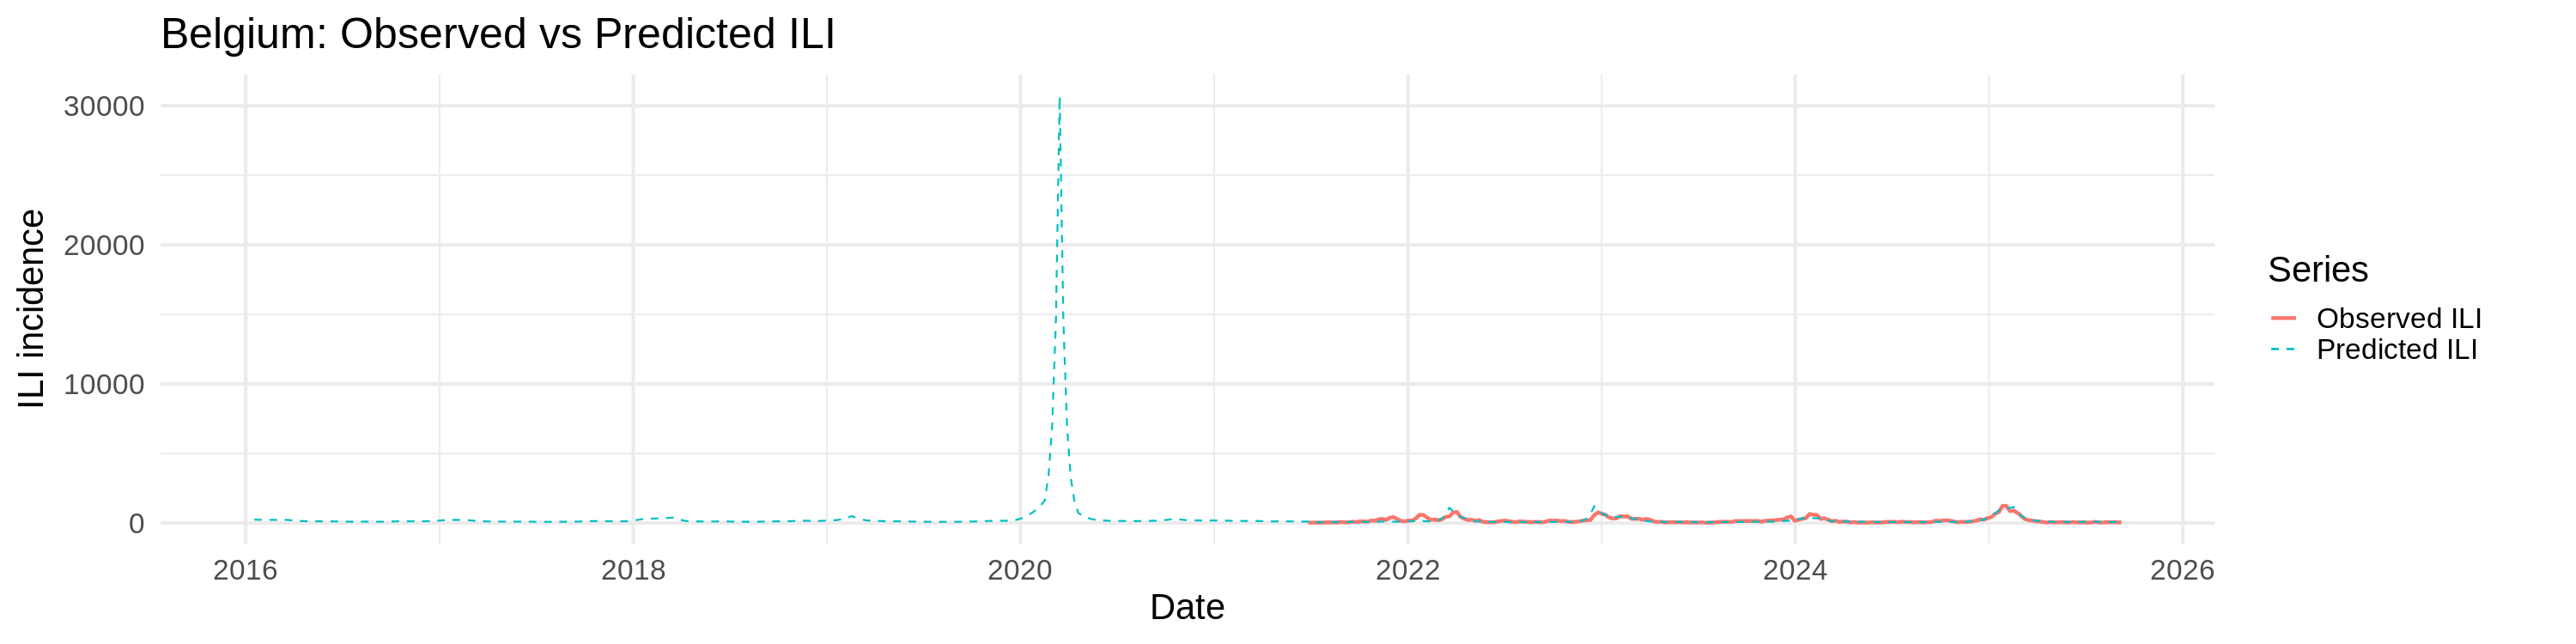

In [140]:
ggplot() +
  geom_line(data = i,
            aes(x = date, y = ili, color = "Observed ILI"), size = 1) +
  geom_line(data = pred_df %>% filter(location == 'BE'),
            aes(x = date, y = ili_pred, color = "Predicted ILI"),
            size = 0.5, linetype = "dashed") +
  geom_line(data = pred_hist_df %>% filter(location == 'BE'),
          aes(x = date, y = ili_pred, color = "Predicted ILI"),
          size = 0.5, linetype = "dashed") +
  labs(title = "Belgium: Observed vs Predicted ILI",
       x = "Date", y = "ILI incidence", color = "Series") +
  theme_minimal(base_size=20)

## Save Data

In [141]:
if (file.exists("/usr/local/lib/python3.6/dist-packages/google/colab/_ipython.py")) {
  install.packages("R.utils")
  library(R.utils)
  library(httr)
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check)
  options(rlang_interactive=TRUE)
}

In [142]:
packages <- c("googledrive", "googlesheets4")
if (length(setdiff(packages, rownames(installed.packages()))) > 0) {
  install.packages(setdiff(packages, rownames(installed.packages())))
}

In [143]:
library(googledrive)
library(googlesheets4)


Attaching package: ‘googlesheets4’


The following objects are masked from ‘package:googledrive’:

    request_generate, request_make




In [144]:
# Save cache in a file so that i don't have to authenticate repeatedly
drive_auth(cache = "/content/drive/My Drive/.secrets", use_oob = TRUE)

The googledrive package is requesting access to your Google account.
Enter '1' to start a new auth process or select a pre-authorized account.
1: Send me to the browser for a new auth process.
2: nadillia.sahputra@isi.it


Selection: 2


In [146]:
write.csv(pred_hist_df, "ili_augment_all.csv", row.names = FALSE)

In [147]:
folder <- drive_get("Flu Forecast")

drive_upload(
  media = "ili_augment_all.csv",
  path = as_id(folder$id),
  name = "ili_augment_all.csv",
  overwrite = TRUE
)

✔ The input `path` resolved to exactly 1 file.

Local file:

• ili_augment_all.csv

Uploaded into Drive file:

• ili_augment_all.csv <id: 1eH2dl-wnlGJneW3scPM1E7evDxrkRUV9>

With MIME type:

• text/csv

